In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools as itools
from collections import OrderedDict
import time

In [10]:
def delete_rep(idx_x,idx_y):
    idx=idx_x+1j*idx_y
    idx = np.array(list(OrderedDict.fromkeys(idx)))
    idx=idx.T
    idx=np.array([idx.real,idx.imag])
    return idx


In [9]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'

In [8]:
from matplotlib import colors
color_list_gold_1=['#FFE964','#BA7322','#FFDC6D','#FFFFB5','#FCFDF6','#FFFF9C','#FDDC53','#D49721','#BB6E03','#5B1F03']
color_list_gold_cyclic=['#FFE964','#BA7322','#FFDC6D','#FFFFB5','#FCFDF6','#FFFF9C','#FDDC53','#D49721','#BB6E03','#5B1F03','#BB6E03','#D49721','#FDDC53','#FFFF9C','#FCFDF6','#FFFFB5','#FFDC6D','#BA7322','#FFE964']
color_list_gold_2=['#FFE964','#BA7322','#8B3E04','#FFDC6D','#FFFFB5','#FCFDF6','#FFFF9C','#FDDC53','#D49721','#BB6E03','#5B1F03']
norm=plt.Normalize(-2,2)
gold_1 = colors.LinearSegmentedColormap.from_list("", color_list_gold_1)
gold_2 = colors.LinearSegmentedColormap.from_list("", color_list_gold_2)

gold_cyclic = colors.LinearSegmentedColormap.from_list("", color_list_gold_cyclic)


In [31]:
for i,j in enumerate(range(5,10)):
    print(i,j)

0 5
1 6
2 7
3 8
4 9


0
1
2
3
4
5
['N=100 M=5 time=11.9375', 'N=100 M=5 time=11.8125', 'N=100 M=7 time=16.203125', 'N=100 M=7 time=16.734375', 'N=100 M=9 time=20.921875', 'N=100 M=9 time=20.984375']


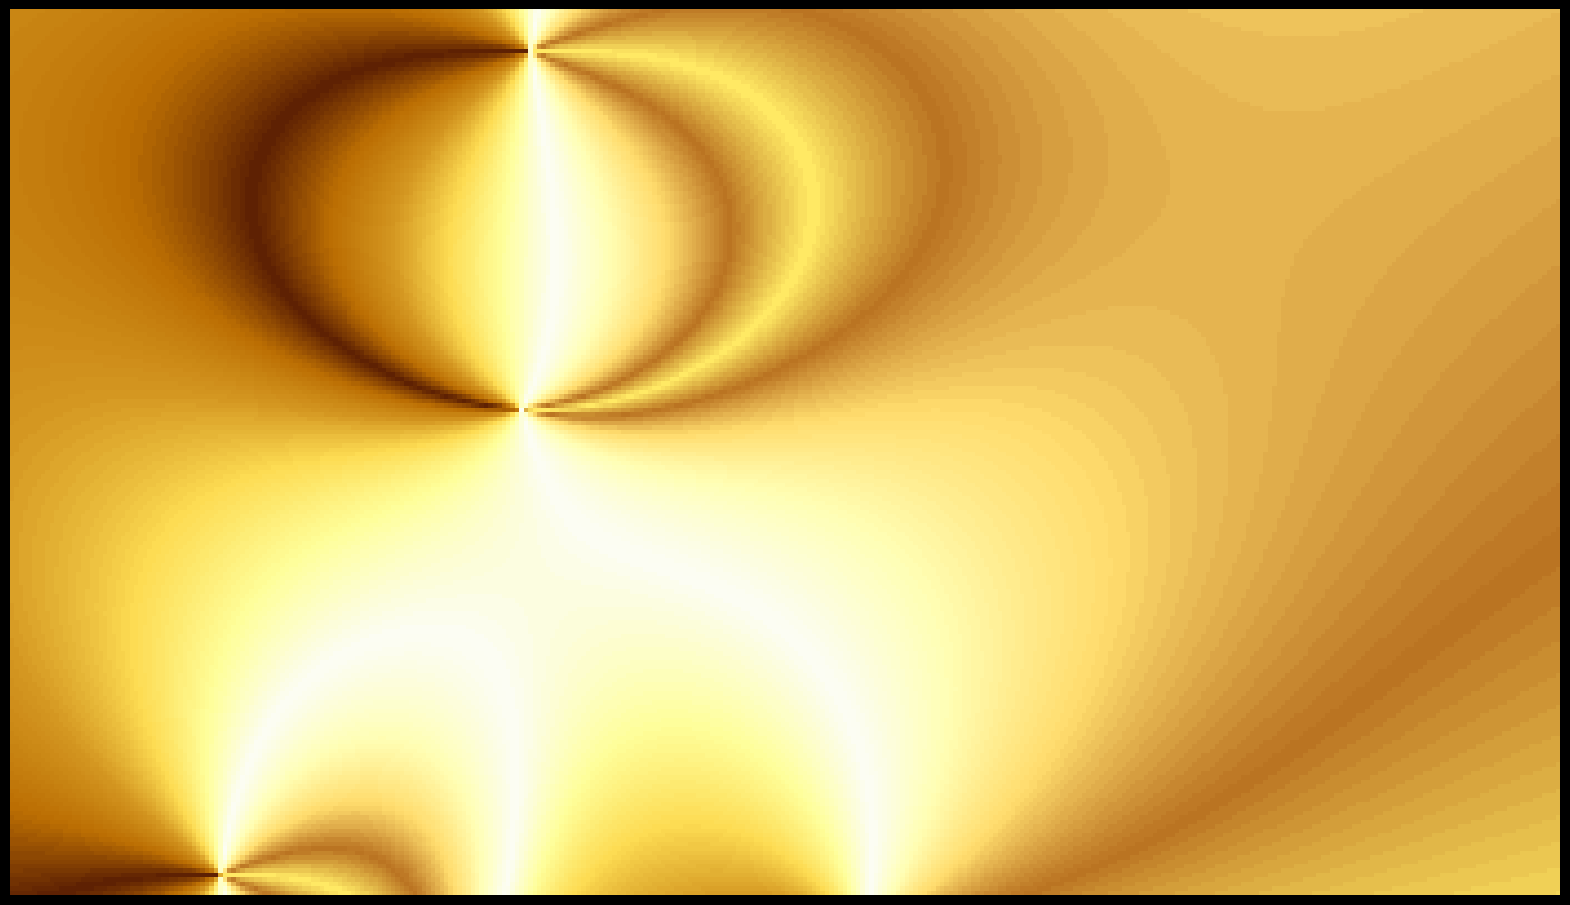

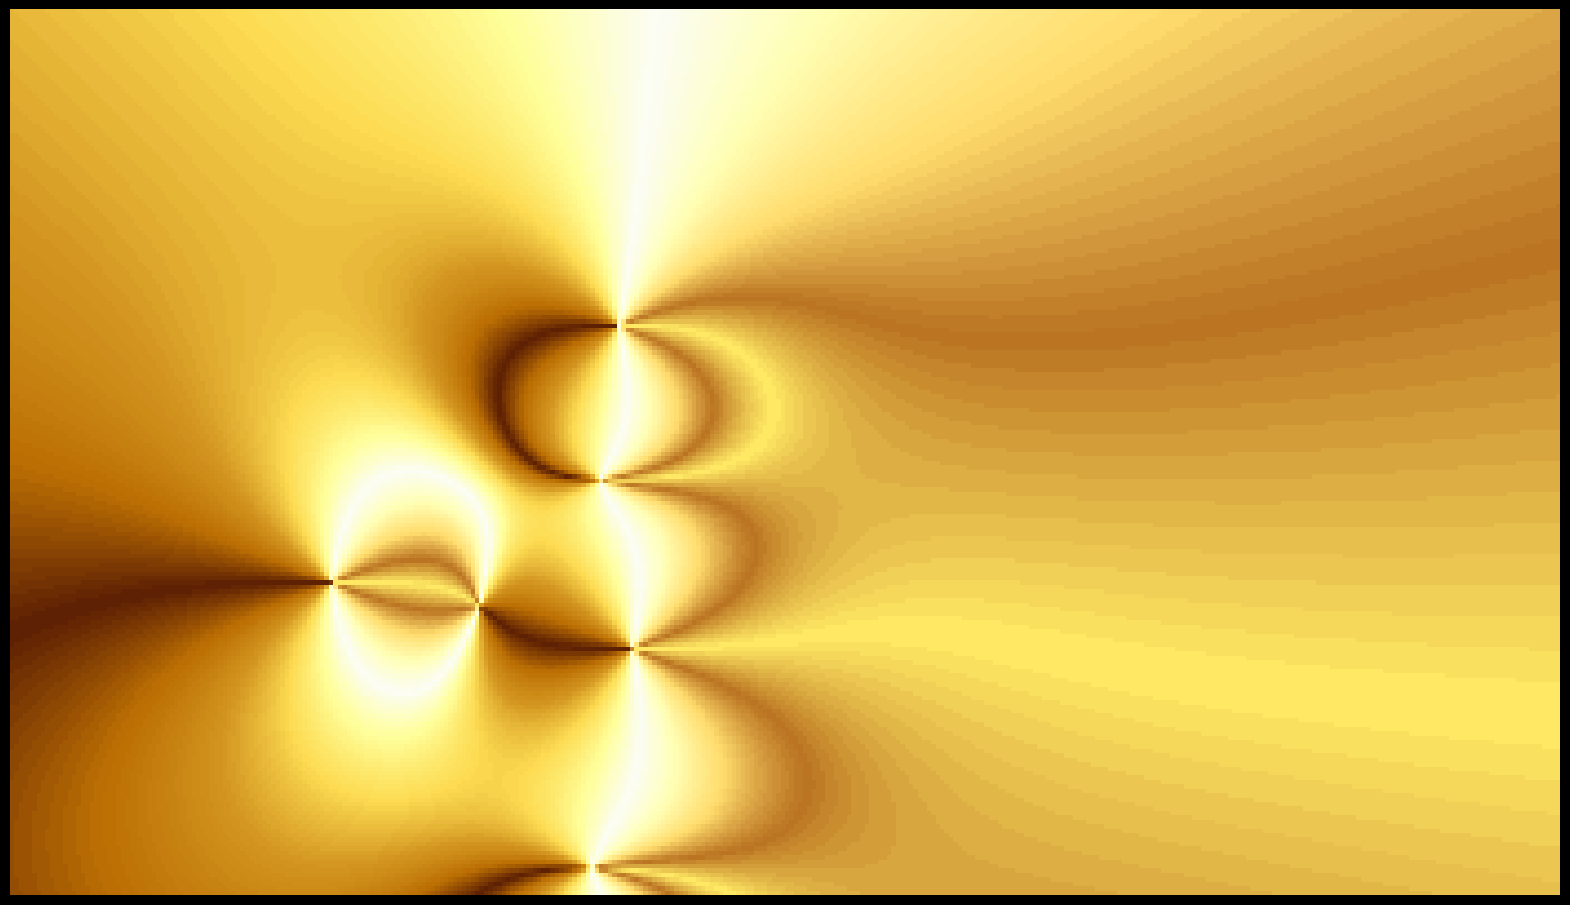

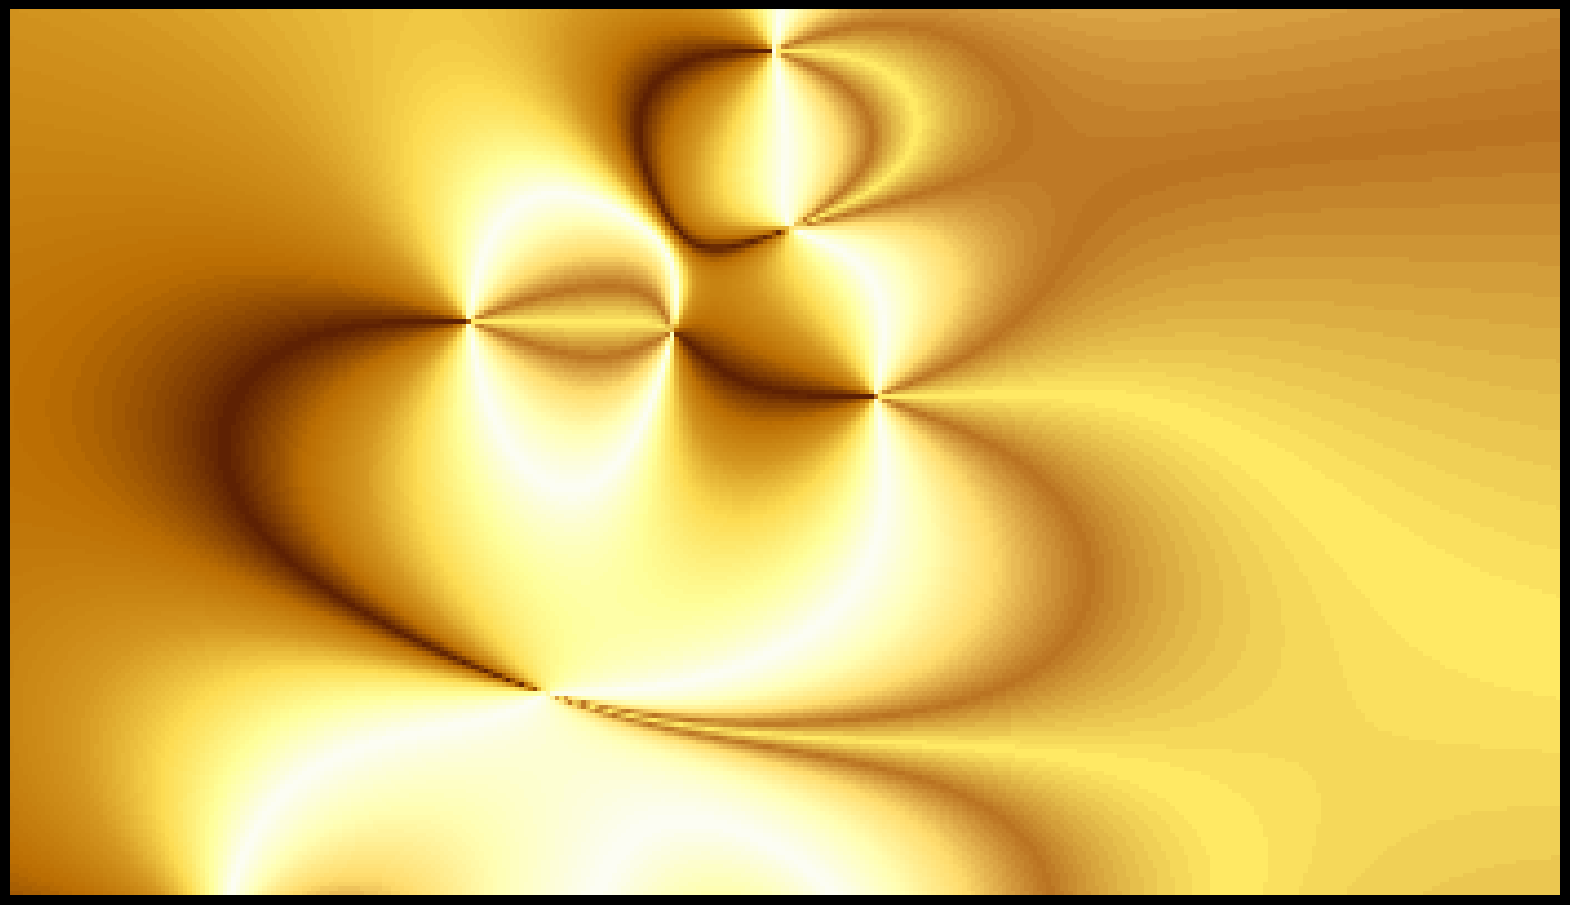

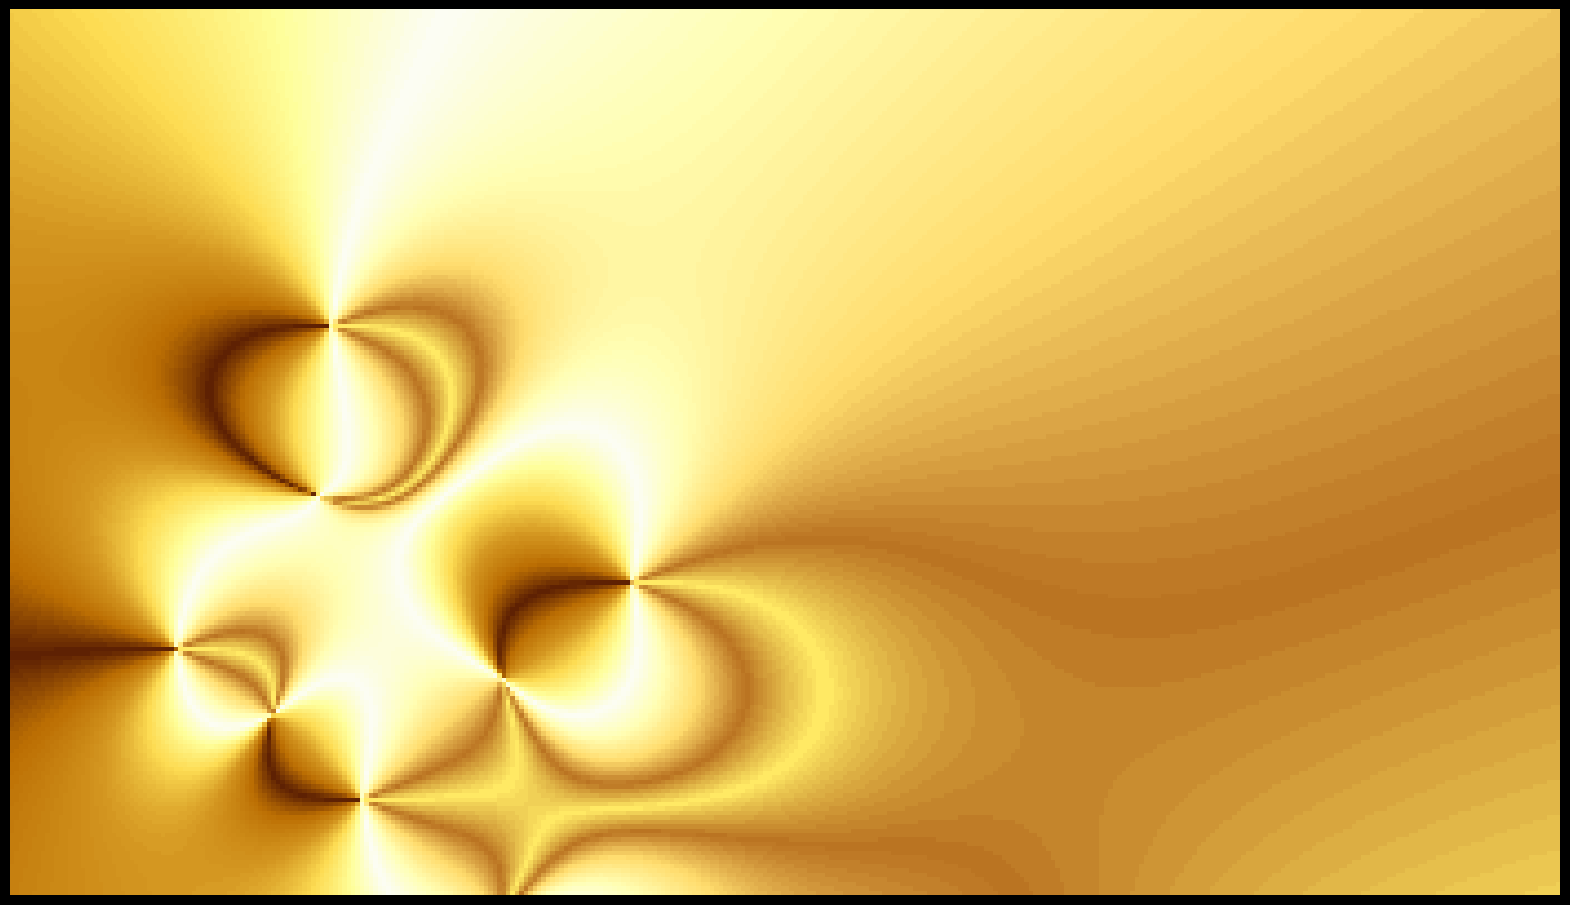

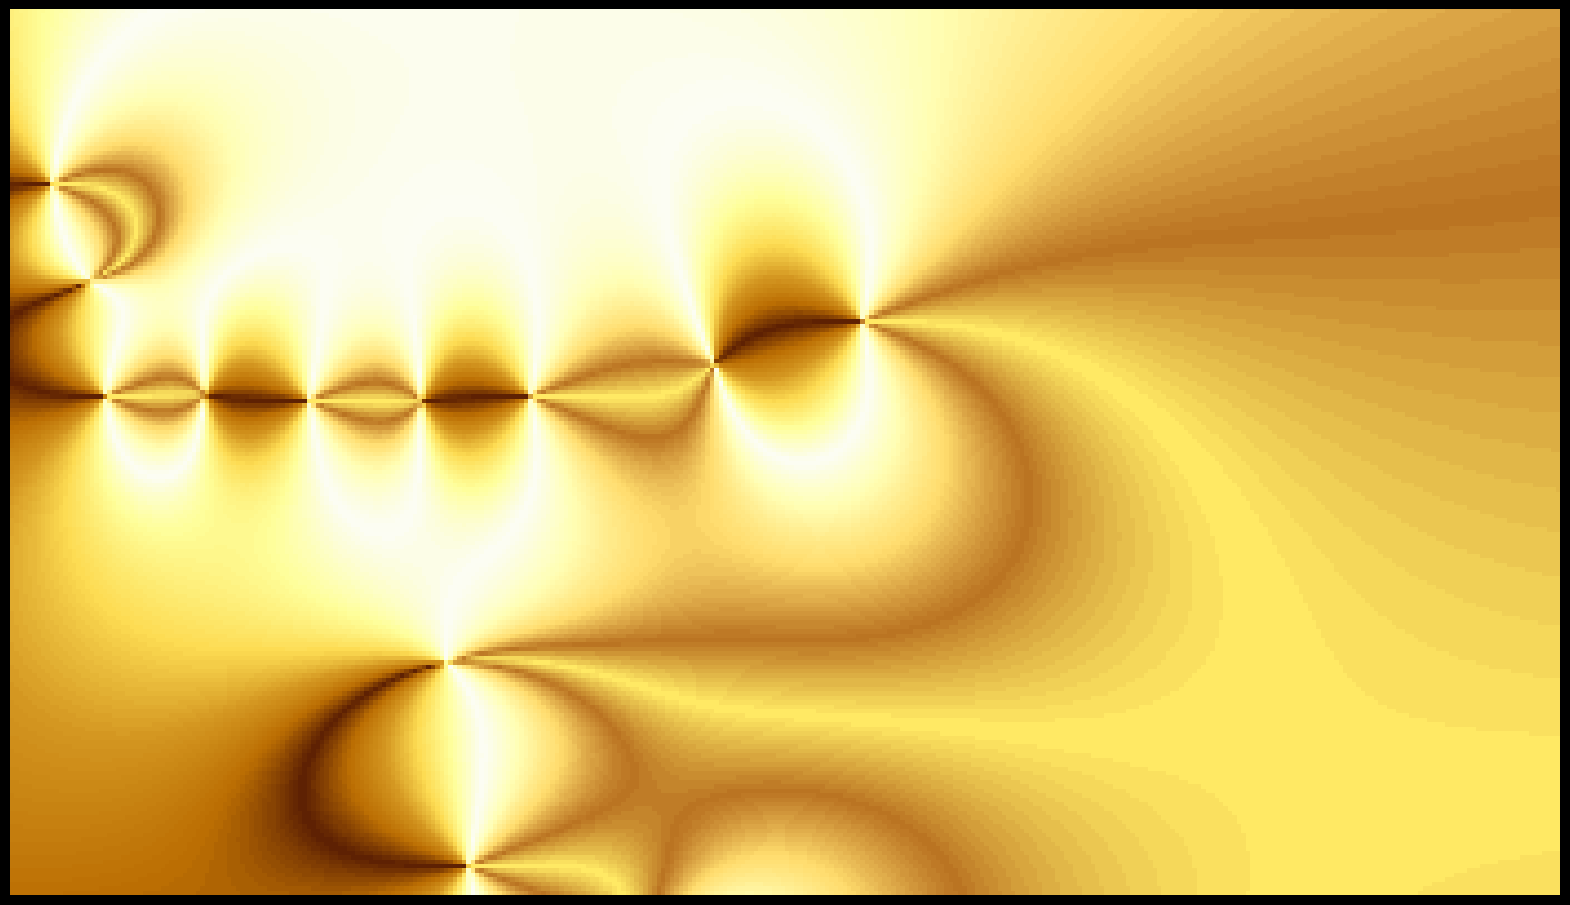

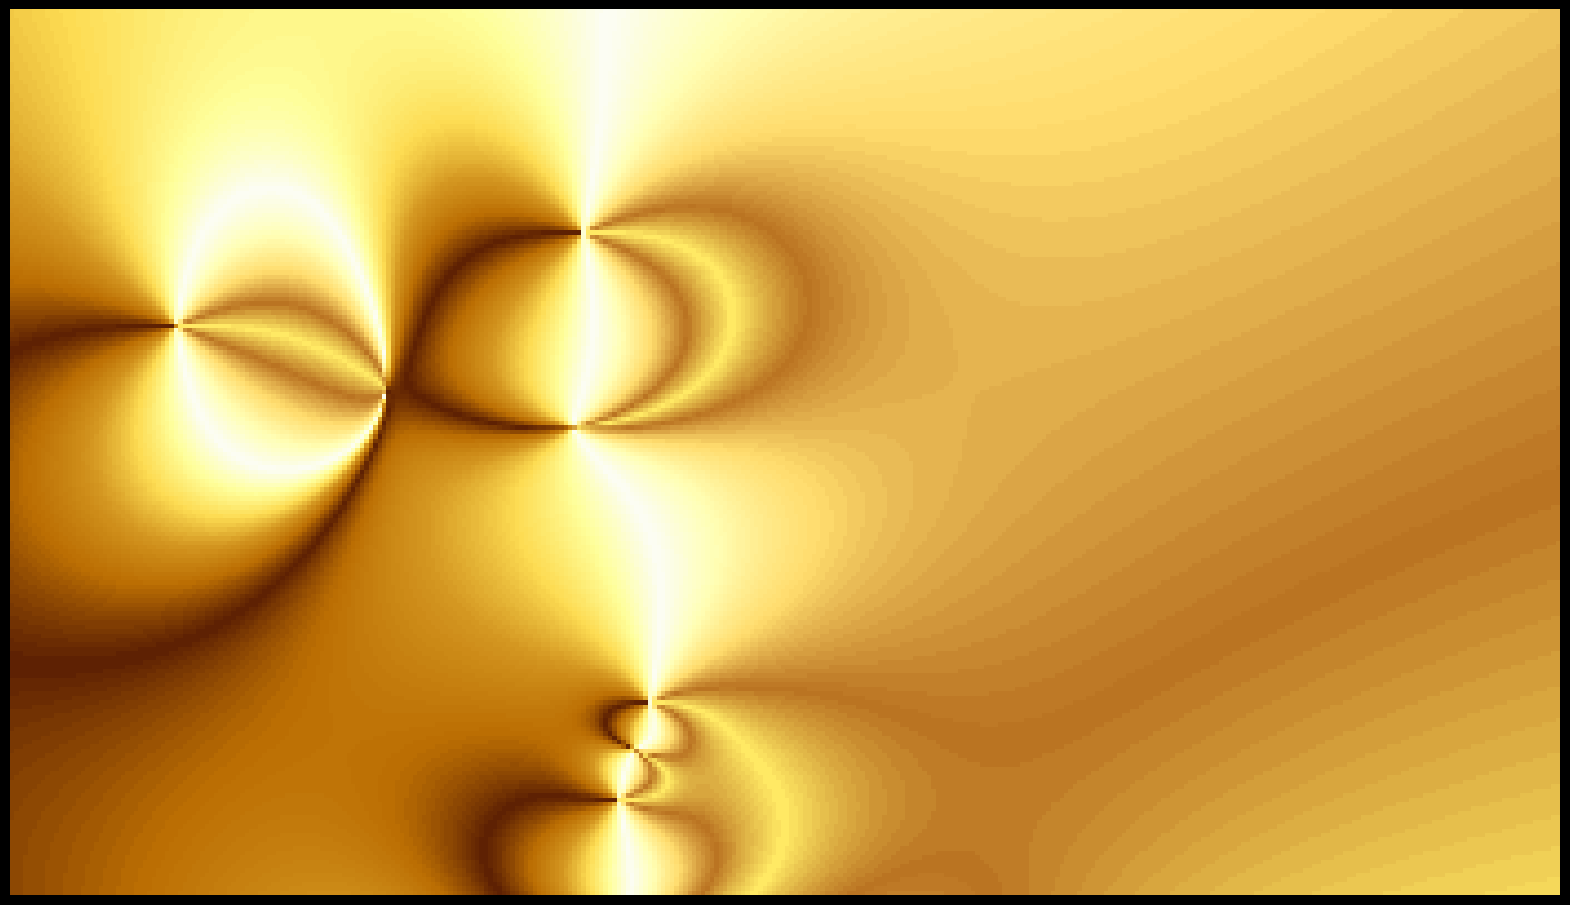

In [43]:
res_x=2
res_y=3.5
N=100
N_x=int(N*res_x)
N_y=int(N*res_y)
C=np.zeros((N_x,N_y),dtype=complex)
t=[]
l=0
for M in range(5,10,2):
    for seed in range(2):
        print(l)
        l+=1
        t_0=time.process_time()
        np.random.seed(seed)
        idx_x=np.random.randint(low=0,high=N_x,size=M)
        idx_y=np.random.randint(low=0,high=N_y,size=M)
        idx=np.array(delete_rep(idx_x,idx_y),dtype=int)

        M=np.shape(idx)[1]
        Weight=np.ones(M)
        C[idx[0],idx[1]]=Weight
        vec=(idx[0]+1j*(idx[1]))
        V=np.zeros((N_x,N_y))
        for i in range(N_x):
            for j in range(N_y):
                F_tot=0
                for k in range(M):
                    vec_ab=(vec[k])-(i*1j+j)
                    if not np.isclose(np.abs(vec_ab),0):
                        F_ab=C[idx.T[k][0],idx.T[k][1]]*(vec_ab)/(np.abs(vec_ab)**3)
                        F_tot+=F_ab
                V[i][j]=np.angle(F_tot)
        plt.figure(figsize=(20,20))
        plt.axis('off')
        plt.imshow(V,cmap=gold_cyclic)
        file='C:/Users/jhash/Pictures/generative_pics/gold_foil/rutherford_N={0}_M={1}_seed={2}.png'.format(N,M,seed)
        plt.savefig(file, bbox_inches='tight',pad_inches=0)

        t_f=time.process_time()-t_0
        t.append("N={0} M={1} time={2}".format(N,M,t_f))
        
print(t)

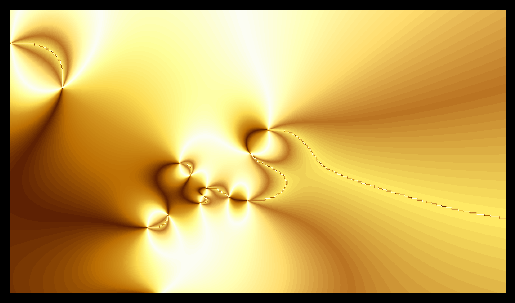

In [29]:
plt.axis('off')
plt.imshow(V,cmap=gold_cyclic)
plt.savefig('C:/Users/jhash/Pictures/generative_pics/rutherford_N={0}_M={1}_seed={2}.png'.format(N,M,seed),dpi=300, bbox_inches='tight',pad_inches=0)


In [7]:
N=100*3
#M=int(N**2*0.001)
M=10
start=time.process_time()
np.random.seed(1)
C=np.zeros((N,N),dtype=complex)
mm=6
idx=np.random.randint(low=0,high=N,size=(2,M))
# a,b=np.mgrid[:mm,:mm]*N/mm
# a=a.flatten()
# b=b.flatten()
# idx=np.array([a,b])
idx=np.array(delete_rep(idx),dtype=int)

M=np.shape(idx)[1]
#print(M)
Weight=np.ones(M)
#Weight=np.random.randn(M)
#Weight=np.random.rand(M)
#Weight=np.arange(M)%10-4.5
C[idx[0],idx[1]]=Weight
#plt.imshow(C.real)
#plt.show()
vec=(idx[0]+1j*(idx[1]))
V=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        F_tot=0
        for k in range(M):
            #print(vec[k])
            vec_ab=(vec[k])-(i*1j+j)+0.5*N*(1j+1)/mm
            if not np.isclose(np.abs(vec_ab),0):
                F_ab=C[idx.T[k][0],idx.T[k][1]]*(vec_ab)/(np.abs(vec_ab)**3)
                F_tot+=F_ab
        #V[i][j]=np.abs(F_tot)
        V[i][j]=np.angle(F_tot)
#V[idx[0],idx[1]]=0
time=time.process_time()-start
print(time)

29.75


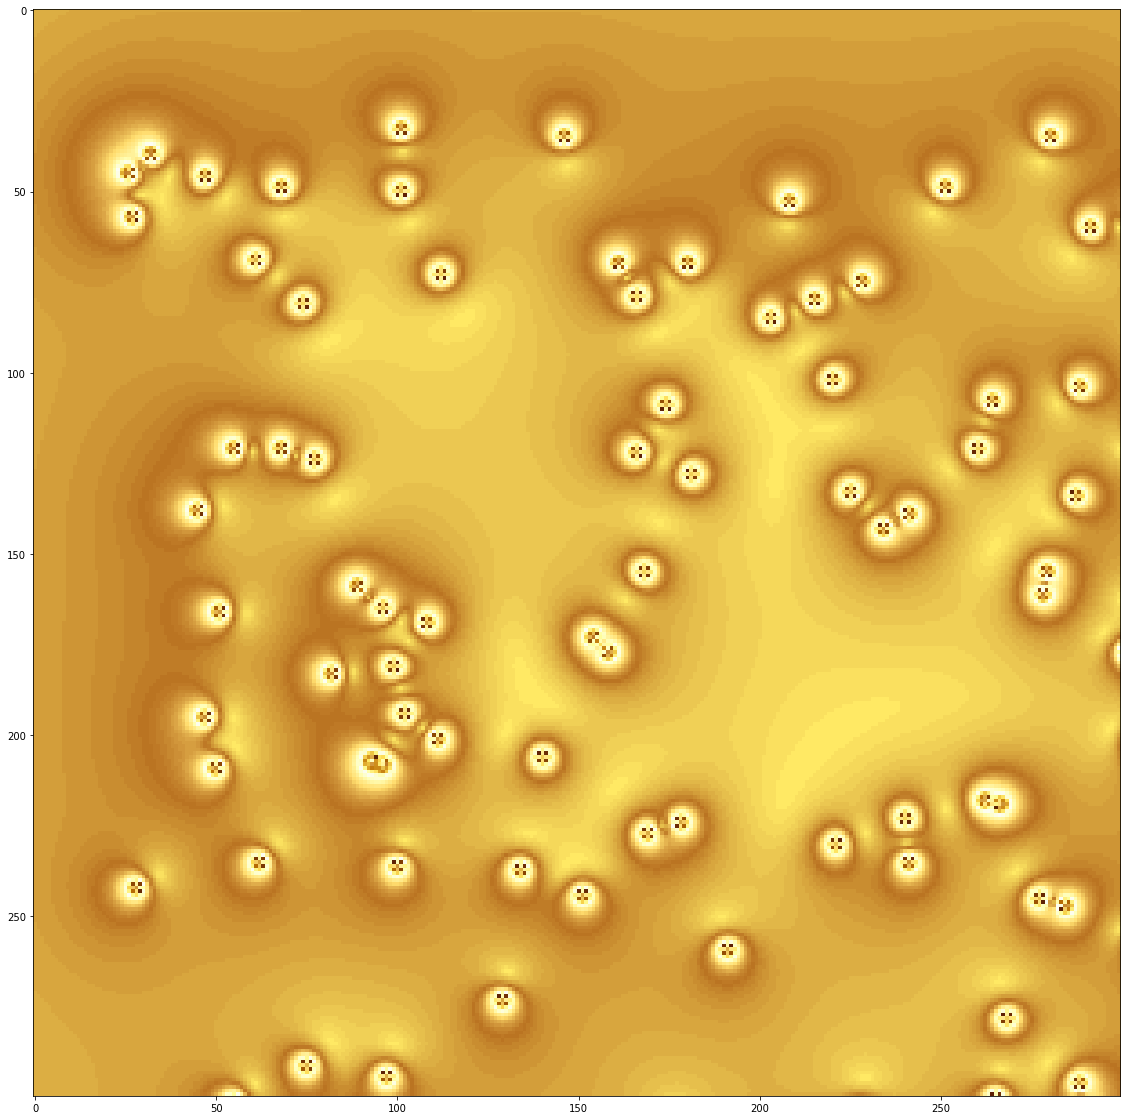

In [81]:
plt.figure(figsize=(20,20))
plt.imshow(V,cmap=gold_cyclic)
#plt.colorbar()
plt.show()

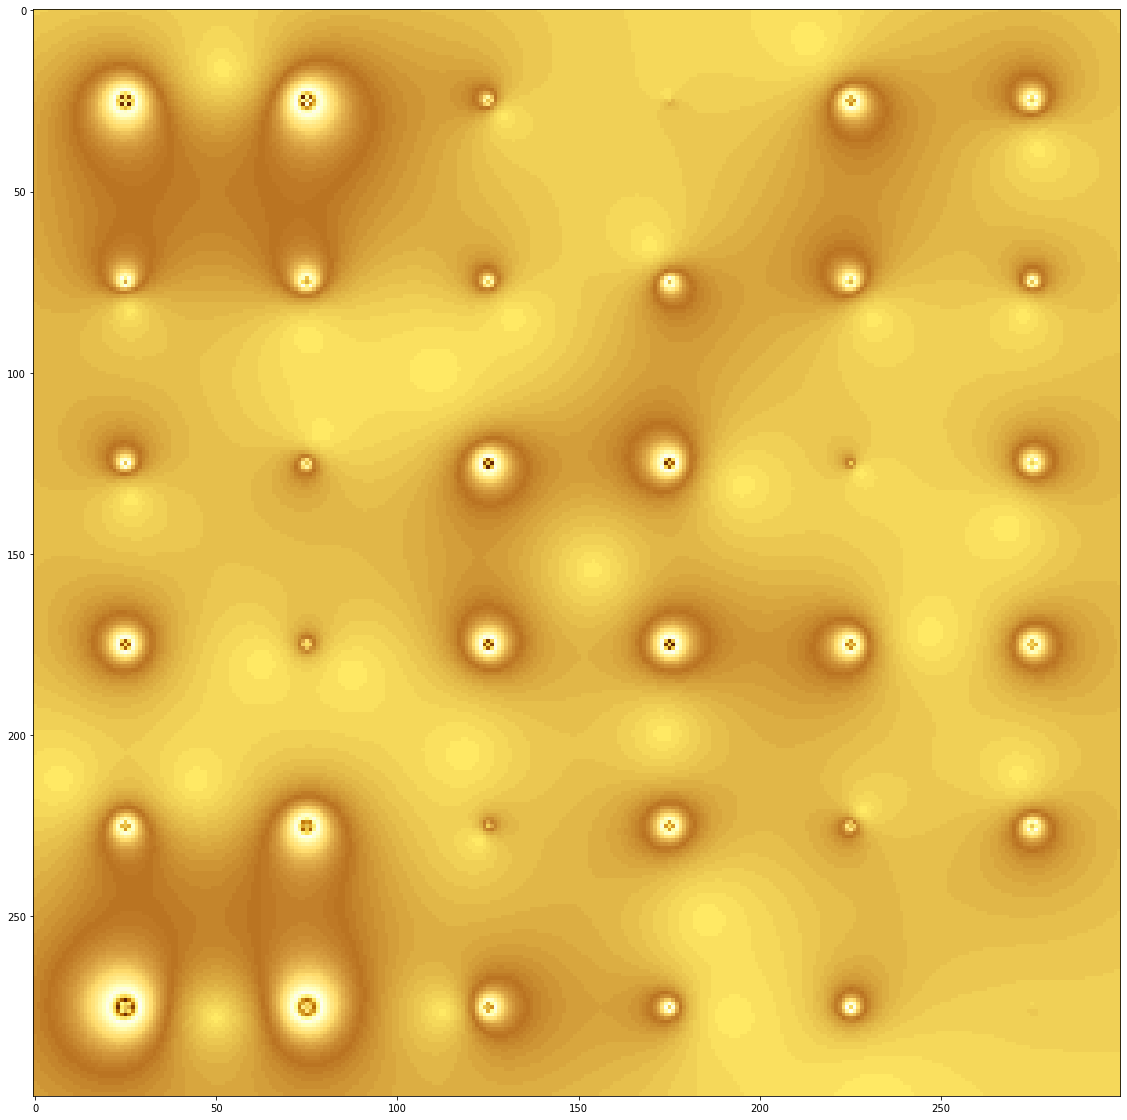

In [65]:
plt.figure(figsize=(20,20))
plt.imshow(V,cmap=gold_cyclic)
#plt.colorbar()
plt.show()

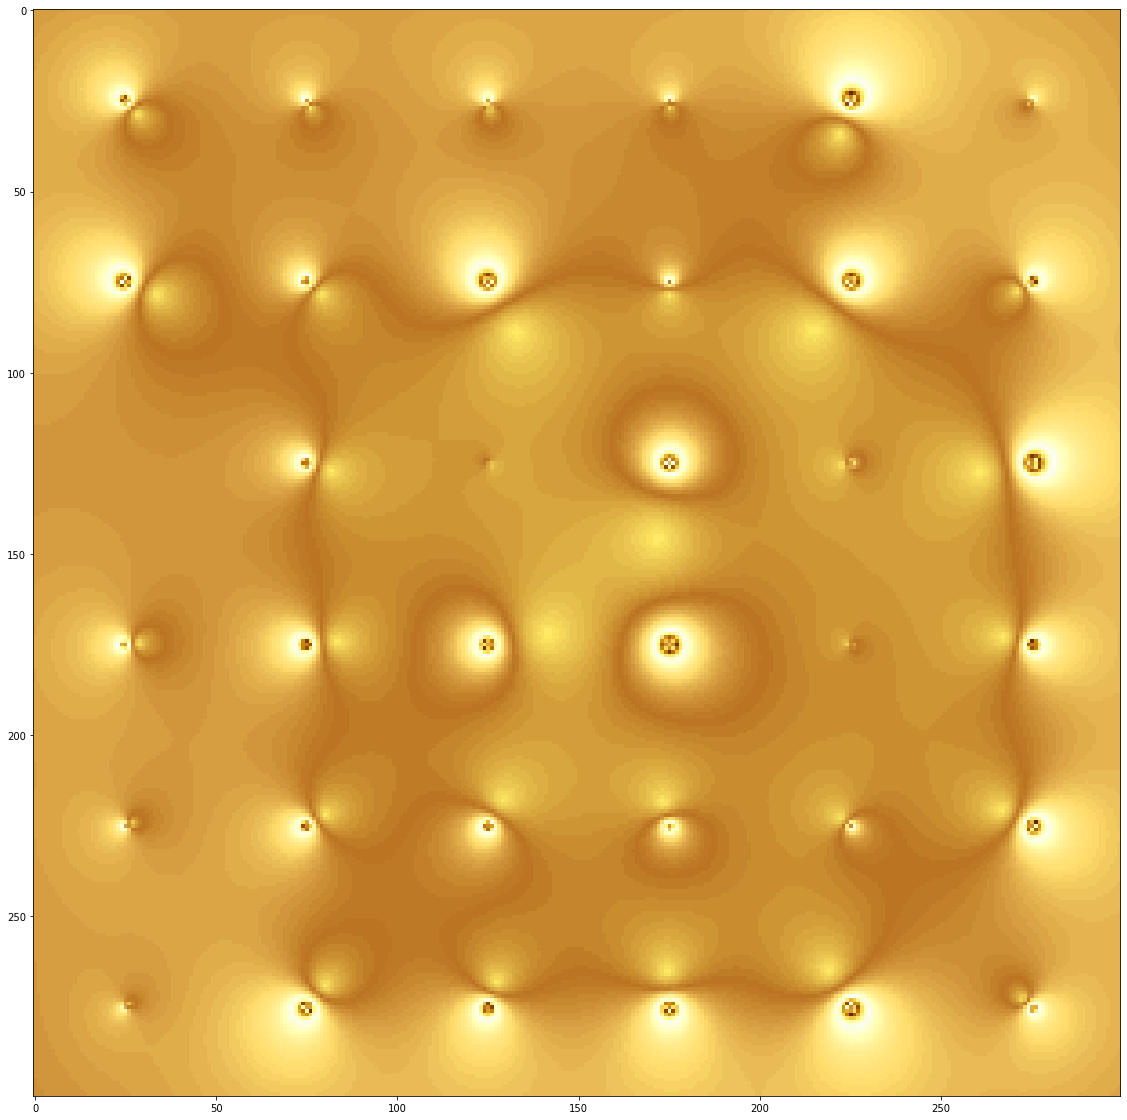

In [67]:
plt.figure(figsize=(20,20))
plt.imshow(V,cmap=gold_cyclic)
#plt.colorbar()
plt.show()

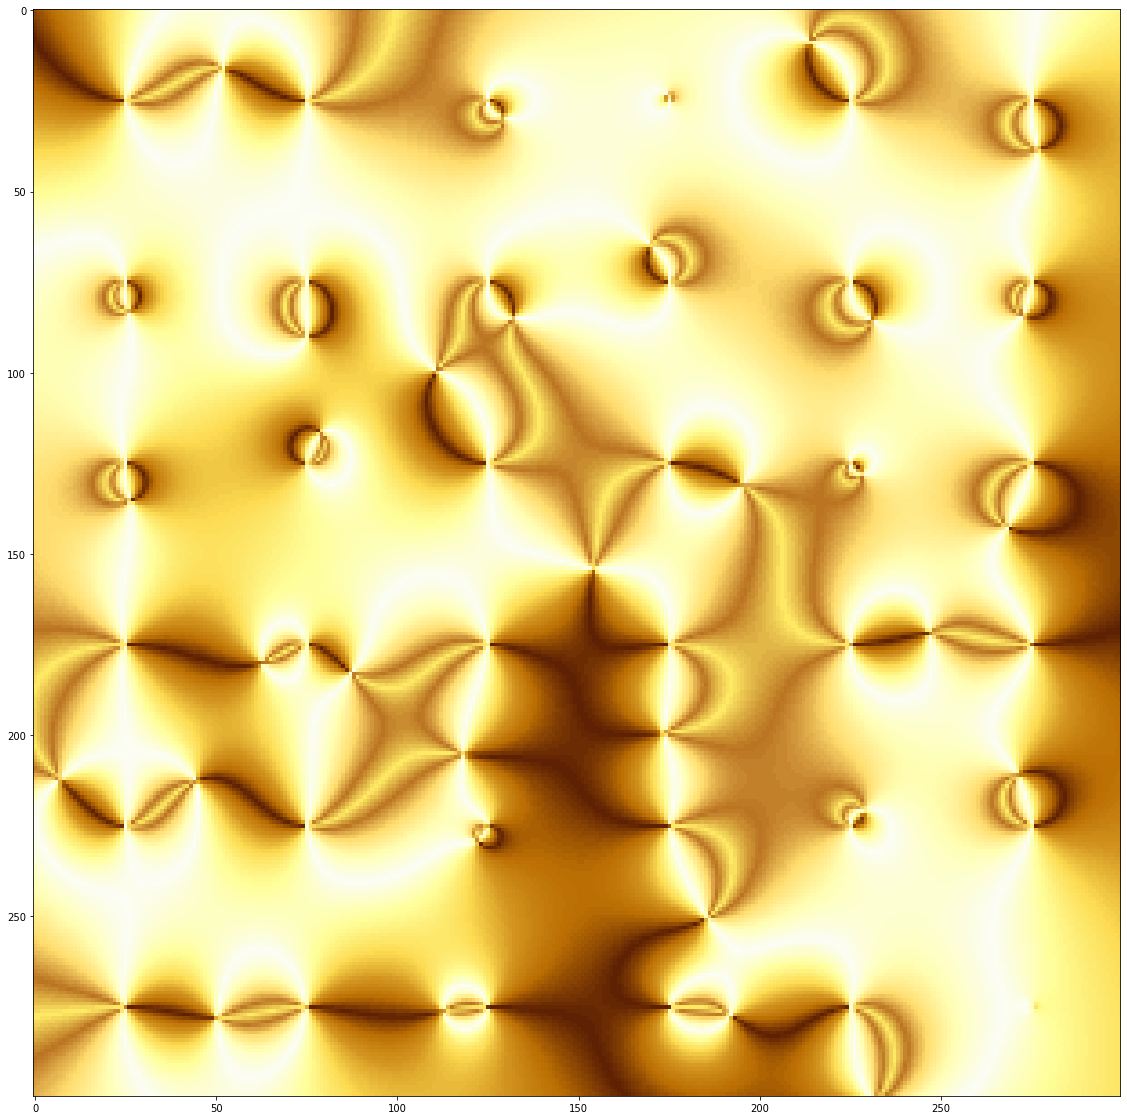

In [55]:
plt.figure(figsize=(20,20))
plt.imshow(V,cmap=gold_cyclic)
#plt.colorbar()
plt.show()

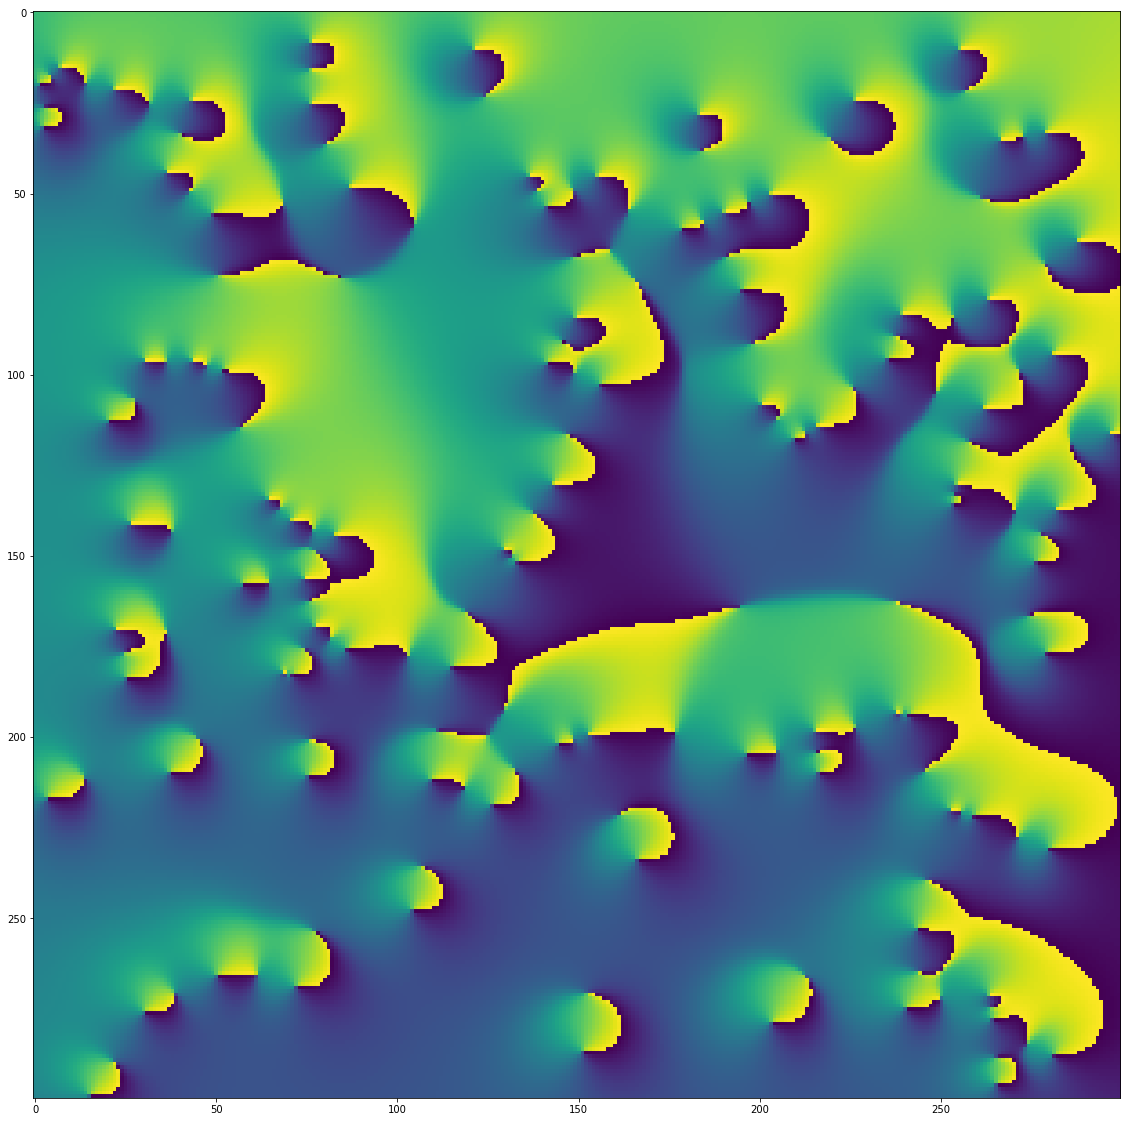

In [8]:
plt.figure(figsize=(20,20))
plt.imshow(V)
#plt.colorbar()
plt.show()

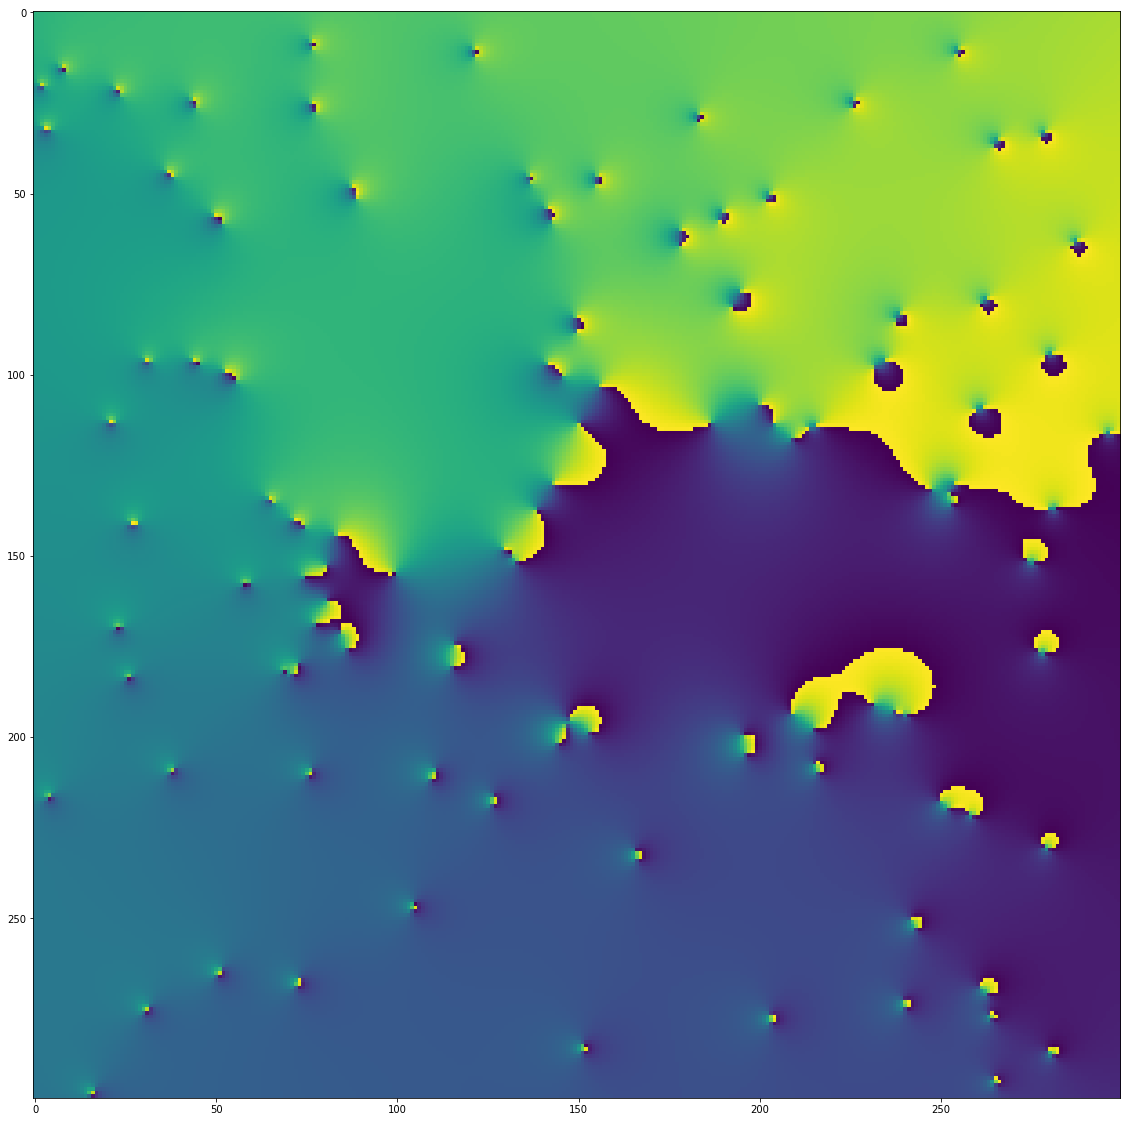

In [9]:
V1=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        F_tot=0
        for k in range(M):
            #print(vec[k])
            vec_ab=(vec[k])-(i*1j+j)
            if not np.isclose(np.abs(vec_ab),0):
                F_ab=C[idx.T[k][0],idx.T[k][1]]*(vec_ab)/(np.abs(vec_ab)**2)
                F_tot+=F_ab
        V1[i][j]=np.angle(F_tot)
#V1[idx[0],idx[1]]=0
plt.figure(figsize=(20,20))
plt.imshow(V1)
#plt.colorbar()
plt.show()

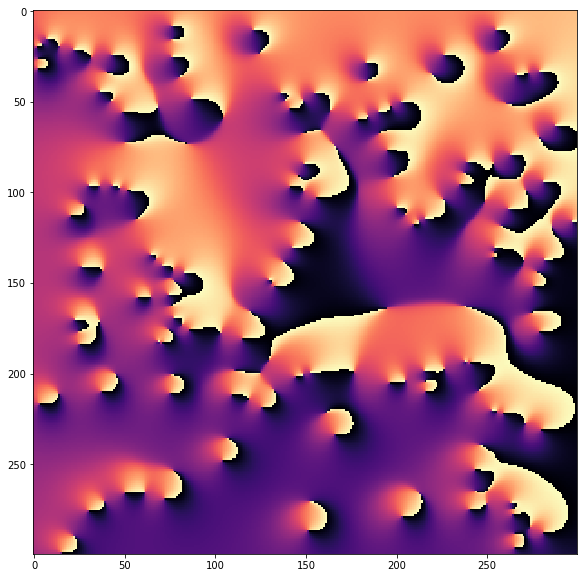

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(V,cmap='magma')
#plt.colorbar()
plt.show()

            
            
            
    

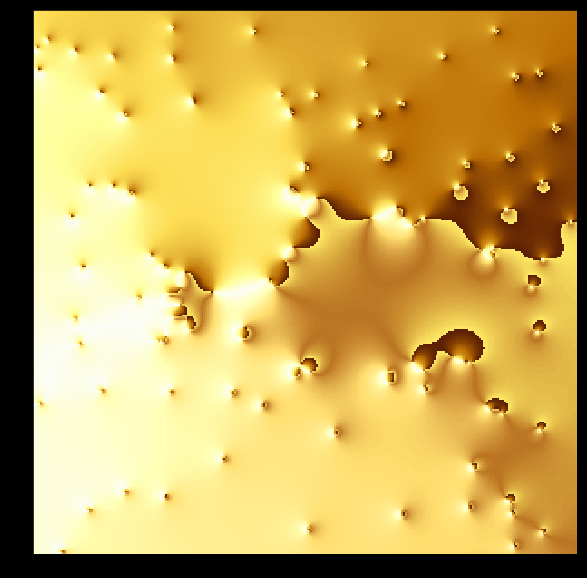

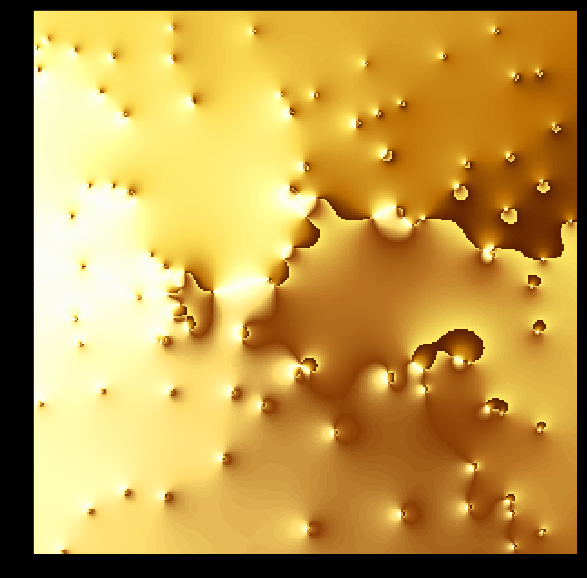

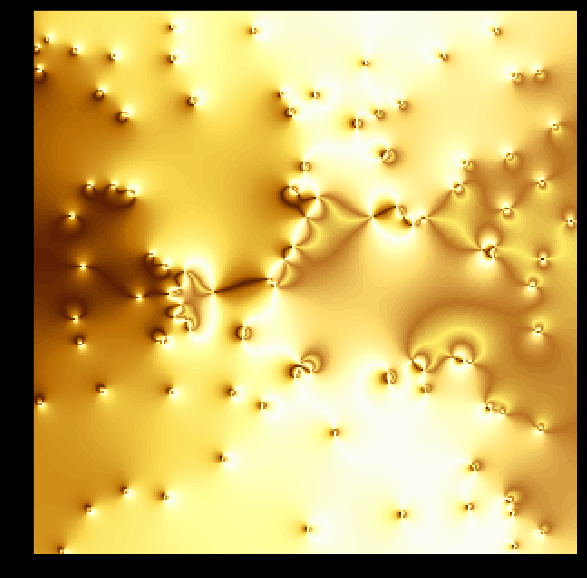

In [23]:
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'

plt.figure(figsize=(10,10))
plt.imshow(V1,cmap=gold_1)
#plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(V1,cmap=gold_2)
#plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(V1,cmap=gold_cyclic)
#plt.colorbar()
plt.show()
            
            
    

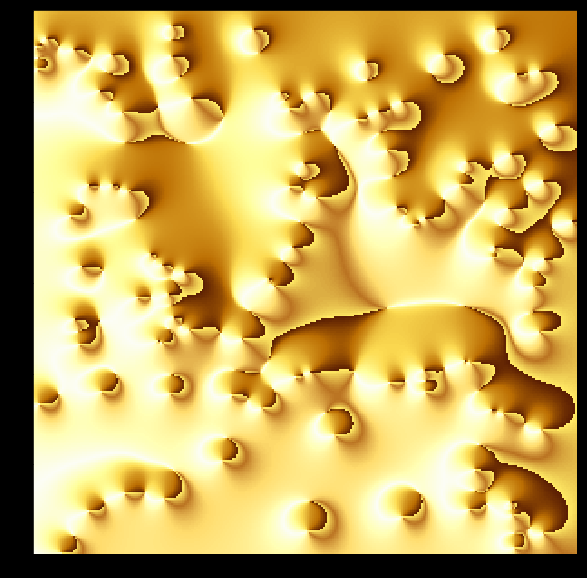

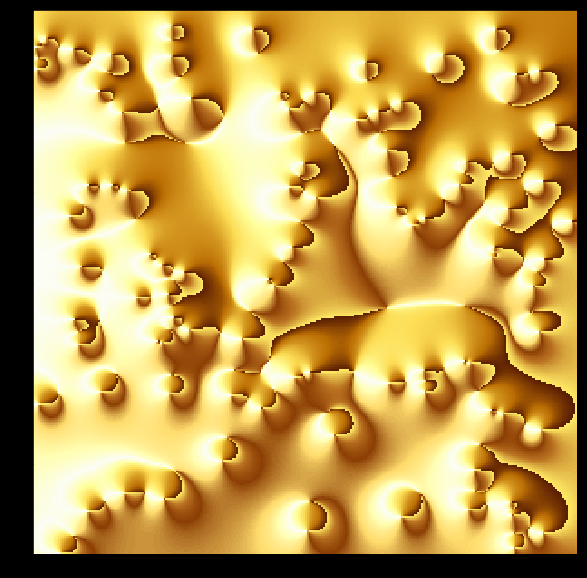

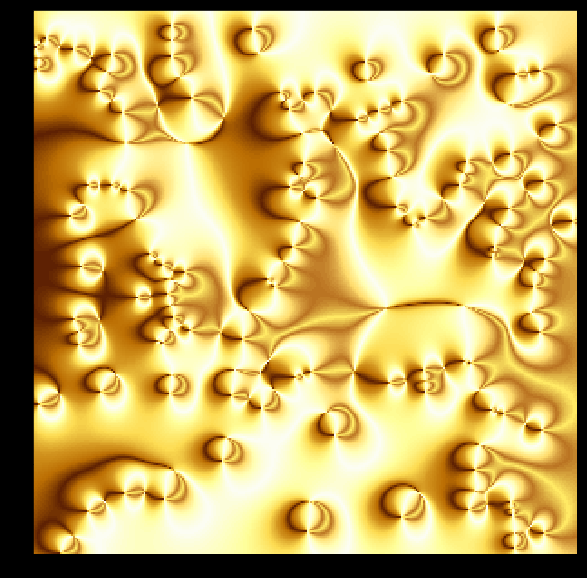

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(V,cmap=gold_1)
#plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(V,cmap=gold_2)
#plt.colorbar()
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(V,cmap=gold_cyclic)
#plt.colorbar()
plt.show()